# News preprocessing

Pre-processed to remove URLS, symbols. That is, things that are not words

In [4]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import style

#One-hot encodding
from sklearn.preprocessing import LabelBinarizer

#Progress bars
from tqdm import tqdm
tqdm.pandas()

#Paralelize pandas apply on multiple cores
import swifter

#Nicer style
style.use('seaborn') 

In [5]:
import re #regexp

In [6]:
from nltk.tokenize import RegexpTokenizer

##We load the news dataset

In [7]:
news = pd.read_csv("..//data//all_data.csv").drop("Unnamed: 0", axis=1)

In [8]:
news.head(10)

,Unnamed: 0.1,author,comments,country,crawled,domain_rank,id,language,likes,main_img_url,...,fear,joy,sadness,surprise,trust,negative,positive,first_all,second_all,third_all
0,NaN,JEREMY W. PETERS,0.0,US,2017-03-14 08:25:04,0,3.0,english,0.0,https://static01.nyt.com/images/2016/11/23/us/...,...,6,20,5,14,30,14,52,409,150,45
1,NaN,STEVE EDER,0.0,US,2017-03-14 08:25:36,0,4.0,english,0.0,https://static01.nyt.com/images/2016/10/18/us/...,...,4,4,4,5,9,8,15,145,38,28
2,NaN,MAGGIE HABERMAN ASHLEY PARKER,0.0,US,2017-03-14 08:25:36,0,5.0,english,0.0,https://static01.nyt.com/images/2016/11/12/us/...,...,8,15,8,6,26,15,34,440,168,68
3,NaN,NELSON D. SCHWARTZ SUI-LEE WEE,0.0,US,2017-03-14 08:25:36,0,6.0,english,0.0,https://static01.nyt.com/images/2016/10/21/bus...,...,10,10,10,6,32,24,43,592,136,71
4,NaN,MAGGIE HABERMAN,0.0,US,2017-03-14 08:25:37,0,7.0,english,0.0,https://static01.nyt.com/images/2016/11/21/us/...,...,3,6,2,4,14,4,25,223,82,28
5,NaN,ERIC LIPTON,0.0,US,2017-03-14 08:25:39,0,8.0,english,0.0,https://static01.nyt.com/images/2016/11/19/us/...,...,3,8,3,6,20,12,34,363,91,33
6,NaN,THE ASSOCIATED PRESS,0.0,US,2017-03-14 08:25:40,0,9.0,english,0.0,https://t4.rbxcdn.com/c5695e5f087535e2066dc473...,...,8,1,5,5,9,12,13,138,32,19
7,NaN,SARAH MASLIN NIR,0.0,US,2017-03-14 08:25:41,0,10.0,english,0.0,https://static01.nyt.com/images/2016/11/17/nyr...,...,23,17,14,14,37,30,46,541,159,63
8,NaN,VIVIAN YEE,0.0,US,2017-03-14 08:25:42,0,11.0,english,0.0,https://static01.nyt.com/images/2016/10/30/nyr...,...,9,13,10,8,34,18,60,541,207,63
9,NaN,MATTHEW GOLDSTEIN,0.0,US,2017-03-14 08:25:43,0,12.0,english,0.0,https://static01.nyt.com/images/2016/11/22/bus...,...,6,10,7,6,21,12,30,242,62,41


In [9]:
news = news.drop("Unnamed: 0.1", axis=1)

In [10]:
news.head()

,author,comments,country,crawled,domain_rank,id,language,likes,main_img_url,ord_in_thread,...,fear,joy,sadness,surprise,trust,negative,positive,first_all,second_all,third_all
0,JEREMY W. PETERS,0.0,US,2017-03-14 08:25:04,0,3.0,english,0.0,https://static01.nyt.com/images/2016/11/23/us/...,0.0,...,6,20,5,14,30,14,52,409,150,45
1,STEVE EDER,0.0,US,2017-03-14 08:25:36,0,4.0,english,0.0,https://static01.nyt.com/images/2016/10/18/us/...,0.0,...,4,4,4,5,9,8,15,145,38,28
2,MAGGIE HABERMAN ASHLEY PARKER,0.0,US,2017-03-14 08:25:36,0,5.0,english,0.0,https://static01.nyt.com/images/2016/11/12/us/...,0.0,...,8,15,8,6,26,15,34,440,168,68
3,NELSON D. SCHWARTZ SUI-LEE WEE,0.0,US,2017-03-14 08:25:36,0,6.0,english,0.0,https://static01.nyt.com/images/2016/10/21/bus...,0.0,...,10,10,10,6,32,24,43,592,136,71
4,MAGGIE HABERMAN,0.0,US,2017-03-14 08:25:37,0,7.0,english,0.0,https://static01.nyt.com/images/2016/11/21/us/...,0.0,...,3,6,2,4,14,4,25,223,82,28


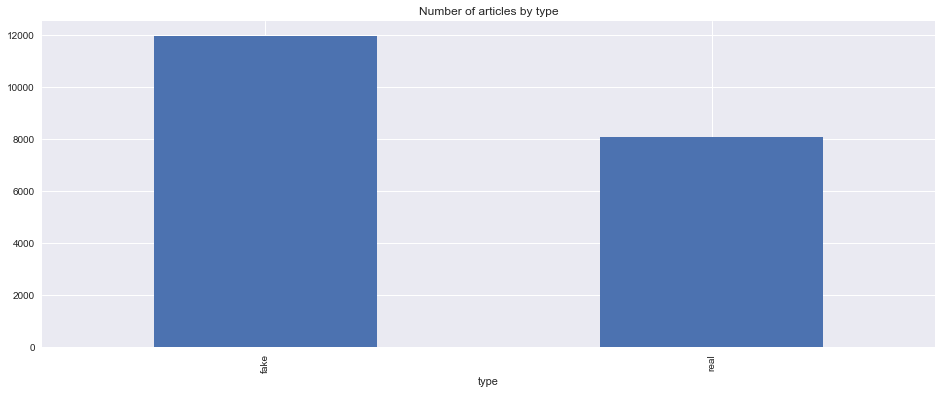

In [11]:
fig, ax = plt.subplots(1,1, figsize=(16,6))
news.groupby("type").count()['text'].plot.bar(title = "Number of articles by type", ax = ax)

### Dataset cleaning

In [12]:
def clean_text(text):
    #Remove URLs
    text = re.sub(r"http\S+", "", text)
    #Tokenize
    tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
    tokens = tokenizer.tokenize(text)
    #Remove non alphanumerica characters
    words = [word for word in tokens if word.isalpha()]    
    return words

We clean the fields we will use: Title and content

In [13]:
#Clean content
news['text'] = news.swifter.apply(lambda row: clean_text(row['text']), axis=1)
#Clean title
news['title'] = news.swifter.apply(lambda row: clean_text(row['title']), axis=1)

#Select only news with text
news = news[news['title'].str.len() >= 1]
news = news[news['text'].str.len() >= 1]

In [14]:
news.head(3)

,author,comments,country,crawled,domain_rank,id,language,likes,main_img_url,ord_in_thread,...,fear,joy,sadness,surprise,trust,negative,positive,first_all,second_all,third_all
0,JEREMY W. PETERS,0.0,US,2017-03-14 08:25:04,0,3.0,english,0.0,https://static01.nyt.com/images/2016/11/23/us/...,0.0,...,6,20,5,14,30,14,52,409,150,45
1,STEVE EDER,0.0,US,2017-03-14 08:25:36,0,4.0,english,0.0,https://static01.nyt.com/images/2016/10/18/us/...,0.0,...,4,4,4,5,9,8,15,145,38,28
2,MAGGIE HABERMAN ASHLEY PARKER,0.0,US,2017-03-14 08:25:36,0,5.0,english,0.0,https://static01.nyt.com/images/2016/11/12/us/...,0.0,...,8,15,8,6,26,15,34,440,168,68


In [15]:
news["text"].head(10)

0    [They, stood, in, line, at, Trump, Tower, some...
1    [Donald, J, Trump, foundation, informed, Attor...
2    [President, Donald, J, Trump, won, the, White,...
3    [An, investment, pitch, for, a, new, Texas, ho...
4    [President, Donald, J, Trump, wife, Melania, a...
5    [WASHINGTON, The, potential, for, conflicts, o...
6    [SAN, DIEGO, Donald, J, Trump, lawyers, agreed...
7    [All, Karen, Hendrickson, wanted, was, the, la...
8    [Of, the, many, rivals, Donald, J, Trump, has,...
9    [Donald, J, Trump, charitable, foundation, wil...
Name: text, dtype: object

### Word2Vec

In [16]:
from gensim.models import KeyedVectors

We load the vectors of a model trained by Google with the texts of millions of news

In [17]:
model = KeyedVectors.load_word2vec_format("..//data//GoogleNews-vectors-negative300.bin.gz", binary=True,
                                          limit=60000)

An example of predicting words similar to "Trump"

In [18]:
model.most_similar("Trump")

[('Donald_Trump', 0.8103920221328735),
 ('Celebrity_Apprentice', 0.51996910572052),
 ('Apprentice', 0.47915542125701904),
 ('Paladino', 0.4655587375164032),
 ('Snooki', 0.4468839764595032),
 ('Harrah', 0.44451743364334106),
 ('MGM_Mirage', 0.4422535300254822),
 ('Vince_McMahon', 0.44097134470939636),
 ('Limbaugh', 0.4399239420890808),
 ('Palin', 0.4383709132671356)]

Next we convert the words of the title and content of the news to the indexes of the vocabulary of Word2Vec.

In [19]:
news['title'] = news.progress_apply(lambda r: 
                        [model.vocab[x].index for x in r['title'] if x in model.vocab], axis=1)

In [20]:
news['text'] = news.progress_apply(lambda r: 
                        [model.vocab[x].index for x in r['text'] if x in model.vocab], axis=1)

Remove articles that have no title (Word2Vec did not have the original words)

In [21]:
news = news[news['title'].map(len) >= 1]

In [22]:
#Reset index
news = news.reset_index().drop("index", axis=1)

But there is a ** problem **: The network input cannot be variable. To solve this, it is necessary to add padding to all arrays, so that all have a physical length.

If they measure less than a certain length $ n $ ($ l <n $) then "elements" with zeros will be added until the necessary dimensions are reached. If you measure more, it will be truncated in such a way that $ l = n $

In [23]:
def pad_array(array, token_len):
    diff_token = token_len - len(array)
    if(diff_token < 0):
        array = array[:token_len] #Truncate
    else:
        #Pad
        array += [0]*diff_token #Pad
        
    return array  

It is necessary to find a `token_len` that is sufficient to cover, in general, the length of all items.

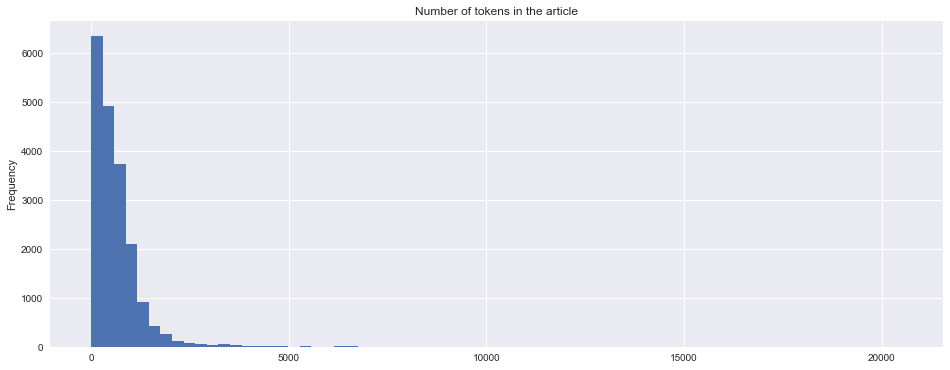

In [25]:
# Token length of each news item
tokens_numbers = news.swifter.apply(lambda row: len(row['text']), axis = 1)

fig, ax = plt.subplots(1,1, figsize=(16,6))
tokens_numbers.plot.hist(title="Number of tokens in the article", bins = 70, ax=ax)

In [26]:
print("Average number of tokens per item: {}".format(int(np.mean(tokens_numbers))))
print("Standard deviation of tokens per item: {}".format(int(np.std(tokens_numbers))))
print("Medium tokens per item: {}".format(int(np.median(tokens_numbers))))

Average number of tokens per item: 621
Standard deviation of tokens per item: 717
Medium tokens per item: 471


In [27]:
max_tokens = np.mean(tokens_numbers) + 2 * np.std(tokens_numbers)
max_tokens = int(max_tokens)

percent_tokens = tokens_numbers[tokens_numbers <= max_tokens].count() / tokens_numbers.count()
print("Selected tokens window: {} - Covers {}% of the dataset".format(max_tokens, percent_tokens*100))

Selected tokens window: 2056 - Covers 97.44714173844949% of the dataset


In [28]:
n_tokens = 8045

In [29]:
news['text'] = news.apply(lambda r: pad_array(r['text'], n_tokens) , axis=1) #n_tokens

Average number of tokens per title: 8
Standard deviation of tokens by title: 3
Medium tokens per title: 8
Selected tokens window: 15 - Covers 96.48655703471678% of the dataset


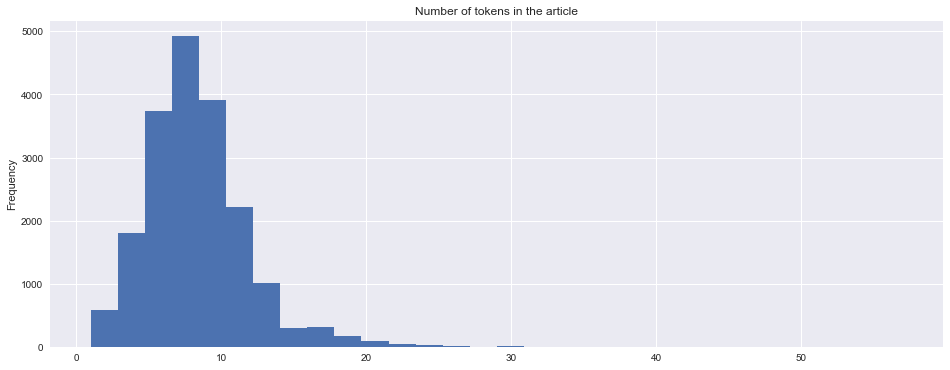

In [30]:
# Token length of each news item
tokens_numbers = news.apply(lambda row: len(row['title']), axis = 1)

fig, ax = plt.subplots(1,1, figsize=(16,6))
tokens_numbers.plot.hist(title="Number of tokens in the article", bins = 30, ax=ax)

print("Average number of tokens per title: {}".format(int(np.mean(tokens_numbers))))
print("Standard deviation of tokens by title: {}".format(int(np.std(tokens_numbers))))
print("Medium tokens per title: {}".format(int(np.median(tokens_numbers))))

max_tokens = np.mean(tokens_numbers) + 2 * np.std(tokens_numbers)
max_tokens = int(max_tokens)

n_tokens = 93

percent_tokens = tokens_numbers[tokens_numbers <= max_tokens].count() / tokens_numbers.count()
print("Selected tokens window: {} - Covers {}% of the dataset".format(max_tokens, percent_tokens*100))

In [31]:
news['title'] = news.progress_apply(lambda r: pad_array(r['title'], n_tokens) , axis=1)

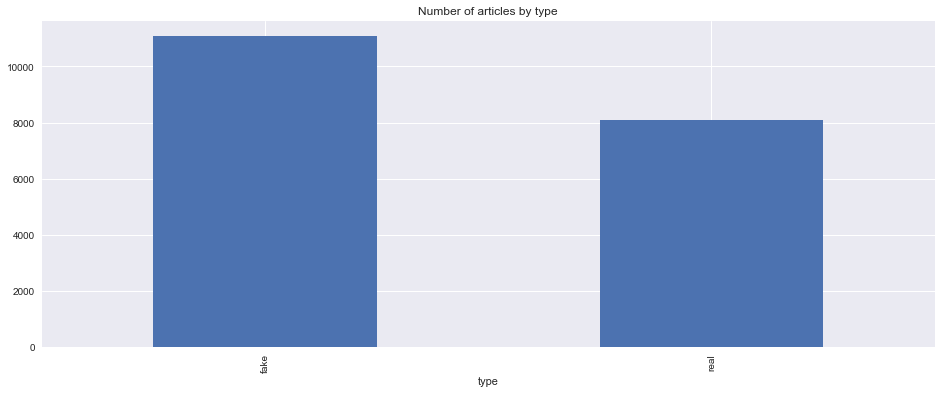

In [44]:
fig, ax = plt.subplots(1,1, figsize=(16,6))
news.groupby("type").count()['text'].plot.bar(title = "Number of articles by type", ax = ax)

In [32]:
#We save the processed dataset as .pickle (serialized python objects).
news.to_pickle('../data/news_proc_12_3_19.pickle')

In [33]:
#We save the processed dataset as .csv.
news.to_csv('../data/news_proc_8_3_19.csv', sep=';')

In [49]:
from ast import literal_eval

In [50]:
news1 = pd.read_csv('../data/news_proc_8_3_19.csv', 
                       sep=';', converters={'content':literal_eval, 
                                       'title':literal_eval})
news1 = news1[['type', 'text', 'title']]
news1['type'].unique()

array(['real', 'fake'], dtype=object)

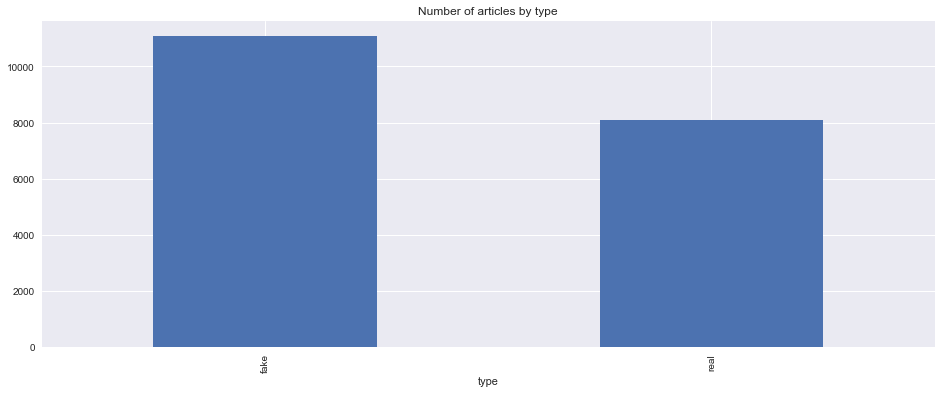

In [47]:
fig, ax = plt.subplots(1,1, figsize=(16,6))
news1.groupby("type").count()['text'].plot.bar(title = "Number of articles by type", ax = ax)